## <center>Universidade do Estado do Amazonas</center>
#### <center>Escola Superior de Tecnologia</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Aquisição, Pré-Processamento e Exploração de Dados (Turma 02)</center>
---
## <center>Trabalho Final</center>
##### <center>Professor: <a href="" target="_blank">PhD. LUIS CUEVAS RODRIGUEZ</a></center>
###### <center>Equipe 3**: Daniel Soares, Leonardo Rocha, Klemerson Castro e Heryck Michael Corrêa</center>

# **1. Objetivo**

Trabalho final de curso com o objetivo de utilizar as técnicas de Ciência de Dados para responder questões interessantes para um Negócio aplicando as técnicas de Coleta de Dados, aplicar métodos de pré-processamento de dados, explorar os dados e responder as questões definidas pela Equipe 

### **1.1. Pergunta Chave do Negócio** 
**A.** Existe relação entre o volume de pesquisas sobre termos referente ao Covid-19 no Google e os novos casos de covid no Brasil e Amazonas?

**B.** Avaliar se os dados disponibilizados pelo Google Trends, relacionado com o Corona Virus podem ser usados por planejadores de políticas públicas para relacionar as pesquisas realizadas com os dados oficiais do Governo.

### **1.2. Introdução**

Quando adoecemos, muitos de nós recorremos ao Google para entender nossos sintomas e opções de tratamento. As buscas online por informações médicas cresceram junto com a taxa de acesso à internet, que hoje chega a 59% em todo o mundo . Começando com o exame de surtos de gripe , os pesquisadores descobriram que a atividade de pesquisa do Google muitas vezes imita a carga real de doenças. Além disso, como as pessoas pesquisam online por informações sobre os sintomas antes (ou em vez de) acessar o atendimento médico, a atividade de pesquisa online dos sintomas pode preceder os surtos de doenças observados . Isso significa que a atividade de pesquisa pode potencialmente usado como um sistema de alerta precoce. Os alertas precoces podem ajudar governos e profissionais de saúde a mobilizar recursos e se preparar para responder - o que é particularmente crucial durante a pandemia COVID-19.
Muitas pesquisas disponiveis na internet mostraram que a atividade de pesquisa do Google está correlacionada com a incidência de várias outras doenças, incluindo dengue, diabetes , Ebola , Zika, entre outras.

---

### Clonando repositório do github (Para leitura dos dados)

In [1]:
! git clone https://github.com/Klemersoncastro/google_trends_covid
%cd google_trends_covid/dados

Cloning into 'google_trends_covid'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 170 (delta 64), reused 77 (delta 24), pack-reused 37
Receiving objects: 100% (170/170), 2.66 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/google_trends_covid/dados


#### Instalando pacotes

In [2]:
! pip install pytrends

#### Importando as bibliotecas

In [3]:
import pandas as pd
import time
from pytrends.request import TrendReq
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **2 -  Coletando os dados**

### **2.1 - Coletando os dados dos casos de Covid-19**

In [4]:
#Lendo base de dados do covid
df_covid = pd.read_csv('casos_covid.csv', index_col=0)

In [5]:
df_covid

,date,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,2020-03-17,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
3,2020-03-18,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
5,2020-03-19,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0000,0,3,state,AC,1,0
7,2020-03-20,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0000,0,4,state,AC,3,0
9,2020-03-21,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655203,2021-02-25,46289333.0,45919049.0,False,False,2014529,4352.03722,2021-02-25,0.0292,58873,367,state,SP,11889,345
1655850,2021-02-26,46289333.0,45919049.0,False,False,2026125,4377.08835,2021-02-26,0.0292,59129,368,state,SP,11596,256
1656497,2021-02-27,46289333.0,45919049.0,False,False,2037267,4401.15869,2021-02-27,0.0292,59428,369,state,SP,11142,299
1657144,2021-02-28,46289333.0,45919049.0,False,False,2041628,4410.57986,2021-02-28,0.0291,59493,370,state,SP,4361,65


### **2.2 - Coletando as trends de volume de pesquisa sobre os sintomas de covid-19**

In [6]:
pytrends = TrendReq()

In [7]:
# Definindo palavras chaves
list_keywords = ['covid','coronavirus','falta de ar','febre','tosse','perda paladar','perda olfato']

#### **2.2.1 - Coletando as trends semanais do Brasil e do Amazonas**

In [8]:
'''
Função:
  - Retorna um dataframe com as trends de todas as palavras passadas como parâmetro em list_keywords.
Parâmetros:
  Serão repassados para a função pytrends.build_payload()
  - list_keywords: Lista de palavras chaves para a coleta das trends.
  - timeframe: Intervalo para a coleta das trends
  - geo: Localização da pesquisa
'''
def get_trends(list_keywords, timeframe, geo) :
  list_dataframe_trends = [] 
  # Coleta as trends de cada uma das palavras e os guarda em uma lista de dataframes (cada trend de uma palavra é um dataframe).
  for keyword in list_keywords :
    pytrends.build_payload(kw_list=[keyword], timeframe=timeframe, geo=geo, gprop='')
    df_trends_keyword = pytrends.interest_over_time()
    list_dataframe_trends.append(df_trends_keyword)
    print(keyword, "- ok")
    time.sleep(3)

  # Concatenando os dataframes de cada palavra/trend em um único dataframe
  df_trends = list_dataframe_trends.pop(0)
  for df_trend in list_dataframe_trends :
    df_trends = pd.concat([df_trends, df_trend], axis=1)
  #df_trends.drop(columns=['isPartial'], inplace=True)

  # Renomeando o nome das colunas
  df_trends.columns = df_trends.columns.str.replace(' ','_')

  return df_trends.reset_index()

In [9]:
# Coletando as trends semanais
df_trendsSemanal_br = get_trends(list_keywords, '2020-01-01 2021-02-27', 'BR')
df_trendsSemanal_am = get_trends(list_keywords, '2020-01-01 2021-02-27', 'BR-AM')

covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok


In [10]:
# Removendo colunas isPartial
df_trendsSemanal_br.drop(columns=['isPartial'], inplace=True)
df_trendsSemanal_am.drop(columns=['isPartial'], inplace=True)

In [11]:
# Visualizando as trends semanais do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,25,39,32,1,1
1,2020-01-12,0,0,21,40,30,1,3
2,2020-01-19,0,4,24,49,25,5,3
3,2020-01-26,0,15,24,43,24,2,4
4,2020-02-02,0,6,25,38,25,2,2
55,2021-01-24,73,3,31,41,30,35,48
56,2021-01-31,71,2,30,40,24,32,41
57,2021-02-07,63,2,25,36,28,30,41
58,2021-02-14,74,3,30,46,29,37,37
59,2021-02-21,93,3,33,48,33,40,48


#### **2.2.2 - Coletando as trends diárias do Brasil e do Amazonas**

In [12]:
# Coletando as trends diárias do Brasil e Amazonas(coleta de até 8 meses para vir de forma diária, ou seja, dividindo a coleta em duas partes.)
print('Trends do Brasil')
df_trendsBR_parte1 = get_trends(list_keywords, '2020-01-01 2020-08-31', 'BR')
df_trendsBR_parte2 = get_trends(list_keywords, '2020-09-01 2021-02-27', 'BR')

print('\nTrends do Amazonas')
df_trendsAM_parte1 = get_trends(list_keywords, '2020-01-01 2020-08-31', 'BR-AM')
df_trendsAM_parte2 = get_trends(list_keywords, '2020-09-01 2021-02-27', 'BR-AM')

Trends do Brasil
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok

Trends do Amazonas
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok
covid - ok
coronavirus - ok
falta de ar - ok
febre - ok
tosse - ok
perda paladar - ok
perda olfato - ok


In [13]:
# Concatenando as duas partes da coleta das trends diárias do Brasil e Amazonas
df_trendsDiario_br = pd.concat([df_trendsBR_parte1, df_trendsBR_parte2], axis=0).drop(columns=['isPartial'])
df_trendsDiario_am = pd.concat([df_trendsAM_parte1, df_trendsAM_parte2], axis=0).drop(columns=['isPartial'])

In [14]:
# Visualizando as trends diárias do Brasil
df_trendsDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-01,0,0,15,28,28,0,0
1,2020-01-02,0,0,20,34,29,5,0
2,2020-01-03,0,0,16,33,30,5,0
3,2020-01-04,0,0,24,36,27,0,5
4,2020-01-05,0,0,22,36,28,6,0
...,...,...,...,...,...,...,...,...
175,2021-02-23,75,54,80,74,65,30,28
176,2021-02-24,78,57,58,83,75,46,32
177,2021-02-25,81,61,72,78,72,52,53
178,2021-02-26,92,60,56,76,74,34,16


---

# **3 - Organizando os dados**

### **3.1 - Juntando as Trends e os Casos de Covid-19 no mesmo dataframe <br> Casos diários**

In [15]:
#Selecionando apenas as colunas de interesse do covid
df_covid_brasil = df_covid[df_covid['place_type']=='state'][['date','new_confirmed','new_deaths']]
df_covid_amazonas = df_covid[(df_covid['place_type']=='state') & (df_covid['state']=='AM')][['date','new_confirmed','new_deaths']]

In [16]:
# Agrupando os casos de covid por dia / casos diários
df_covidDiario_br = df_covid_brasil.groupby(by=['date']).sum().reset_index()
df_covidDiario_am = df_covid_amazonas.groupby(by=['date']).sum().reset_index()

In [17]:
# Visualizando os campos selecionados dos casos de covid
df_covidDiario_br

,date,new_confirmed,new_deaths
0,2020-02-25,1,0
1,2020-02-26,0,0
2,2020-02-27,0,0
3,2020-02-28,1,0
4,2020-02-29,0,0
...,...,...,...
366,2021-02-25,68141,1576
367,2021-02-26,63530,1340
368,2021-02-27,58418,1252
369,2021-02-28,33288,772


In [18]:
# Mudando as datas dos casos de covid para o tipo date
df_covidDiario_br['date'] = pd.to_datetime(df_covidDiario_br['date'])
df_covidDiario_am['date'] = pd.to_datetime(df_covidDiario_am['date'])

In [19]:
# Visualizando Trends de volume de pesquisa diária sobre o Covid no Brasil
df_trendsDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-01,0,0,15,28,28,0,0
1,2020-01-02,0,0,20,34,29,5,0
2,2020-01-03,0,0,16,33,30,5,0
3,2020-01-04,0,0,24,36,27,0,5
4,2020-01-05,0,0,22,36,28,6,0
...,...,...,...,...,...,...,...,...
175,2021-02-23,75,54,80,74,65,30,28
176,2021-02-24,78,57,58,83,75,46,32
177,2021-02-25,81,61,72,78,72,52,53
178,2021-02-26,92,60,56,76,74,34,16


In [20]:
# Juntando as trends com os casos de covid no mesmo dataframe
df_casosDiario_br = df_trendsDiario_br.merge(df_covidDiario_br, how='outer', on='date')
df_casosDiario_am = df_trendsDiario_am.merge(df_covidDiario_am, how='outer', on='date')

In [21]:
# Visualiazando a junção entre as Trends de volume de pesquisa e os casos de covid no Brasil
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-01,0.0,0.0,15.0,28.0,28.0,0.0,0.0,NaN,NaN
1,2020-01-02,0.0,0.0,20.0,34.0,29.0,5.0,0.0,NaN,NaN
2,2020-01-03,0.0,0.0,16.0,33.0,30.0,5.0,0.0,NaN,NaN
3,2020-01-04,0.0,0.0,24.0,36.0,27.0,0.0,5.0,NaN,NaN
4,2020-01-05,0.0,0.0,22.0,36.0,28.0,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
421,2021-02-25,81.0,61.0,72.0,78.0,72.0,52.0,53.0,68141.0,1576.0
422,2021-02-26,92.0,60.0,56.0,76.0,74.0,34.0,16.0,63530.0,1340.0
423,2021-02-27,98.0,62.0,62.0,81.0,86.0,22.0,37.0,58418.0,1252.0
424,2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33288.0,772.0


In [22]:
#Selecionando os casos de covid até o dia 27/02/2021 (até onde foi coletado as trends)
df_casosDiario_br = df_casosDiario_br[df_casosDiario_br['date']<='2021-02-27']
df_casosDiario_am = df_casosDiario_am[df_casosDiario_am['date']<='2021-02-27']

In [23]:
# Substituindo os valores nulos por zero
df_casosDiario_br = df_casosDiario_br.fillna(0)
df_casosDiario_am = df_casosDiario_am.fillna(0)

In [24]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-01,0.0,0.0,15.0,28.0,28.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,20.0,34.0,29.0,5.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,16.0,33.0,30.0,5.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,24.0,36.0,27.0,0.0,5.0,0.0,0.0
4,2020-01-05,0.0,0.0,22.0,36.0,28.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
419,2021-02-23,75.0,54.0,80.0,74.0,65.0,30.0,28.0,63588.0,1358.0
420,2021-02-24,78.0,57.0,58.0,83.0,75.0,46.0,32.0,65387.0,1446.0
421,2021-02-25,81.0,61.0,72.0,78.0,72.0,52.0,53.0,68141.0,1576.0
422,2021-02-26,92.0,60.0,56.0,76.0,74.0,34.0,16.0,63530.0,1340.0


In [25]:
# Mudando os tipos das colunas float para int
df_casosDiario_br.iloc[:, 1:] = df_casosDiario_br.iloc[:, 1:].astype(int)
df_casosDiario_am.iloc[:, 1:] = df_casosDiario_am.iloc[:, 1:].astype(int)

In [26]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-01,0,0,15,28,28,0,0,0,0
1,2020-01-02,0,0,20,34,29,5,0,0,0
2,2020-01-03,0,0,16,33,30,5,0,0,0
3,2020-01-04,0,0,24,36,27,0,5,0,0
4,2020-01-05,0,0,22,36,28,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...
419,2021-02-23,75,54,80,74,65,30,28,63588,1358
420,2021-02-24,78,57,58,83,75,46,32,65387,1446
421,2021-02-25,81,61,72,78,72,52,53,68141,1576
422,2021-02-26,92,60,56,76,74,34,16,63530,1340


### **3.2 - Juntando as Trends e os casos de Covid-19 no mesmo dataframe <br> Casos semanais**

In [27]:
# Visualizando os casos de diário do Brasil
df_covidDiario_br

,date,new_confirmed,new_deaths
0,2020-02-25,1,0
1,2020-02-26,0,0
2,2020-02-27,0,0
3,2020-02-28,1,0
4,2020-02-29,0,0
...,...,...,...
366,2021-02-25,68141,1576
367,2021-02-26,63530,1340
368,2021-02-27,58418,1252
369,2021-02-28,33288,772


In [28]:
# Visualizando as trends de volume de pesquisa semanal do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,25,39,32,1,1
1,2020-01-12,0,0,21,40,30,1,3
2,2020-01-19,0,4,24,49,25,5,3
3,2020-01-26,0,15,24,43,24,2,4
4,2020-02-02,0,6,25,38,25,2,2
55,2021-01-24,73,3,31,41,30,35,48
56,2021-01-31,71,2,30,40,24,32,41
57,2021-02-07,63,2,25,36,28,30,41
58,2021-02-14,74,3,30,46,29,37,37
59,2021-02-21,93,3,33,48,33,40,48


In [29]:
'''
Função para agrupar os casos de covid por semana de acordo com as mesmas semanas das trends.
Parâmetros:
  df_casosDiarioCovid: dataframe de casos de covid diário com as colunas |date|new_confirmed|new_death
  df_trendSemanal: dataframe com as trends semanais.
Return:
  Retorna um dataframe já com as trends e casos de covid juntas. Por semana.
'''
def agruparCasosCovidPorSemana(df_casosDiarioCovid, df_trendSemanal) :
  list_dict_covid_casosPorSemana = []
  data_primeiro_caso_covid = df_casosDiarioCovid['date'].min()
  for data in df_trendSemanal['date'] :
    if pd.to_datetime(data) < pd.to_datetime(data_primeiro_caso_covid) :
      list_dict_covid_casosPorSemana.append({'date':data, 'new_confirmed':0, 'new_deaths':0})
    else :
      list_dict_covid_casosPorSemana.append(
          {'date': data, 
          'new_confirmed': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_confirmed'].sum(),
          'new_deaths': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_deaths'].sum()
          }
      )
  return pd.DataFrame(list_dict_covid_casosPorSemana)

In [30]:
# Agrupando os casos de covid por semana de acordo com as semanas das trends
df_covidSemanal_br = agruparCasosCovidPorSemana(df_covidDiario_br, df_trendsSemanal_br)
df_covidSemanal_am = agruparCasosCovidPorSemana(df_covidDiario_am, df_trendsSemanal_am)

In [31]:
# Visualizando as 4 primeiras e últimas semanas dos casos de covid no Brasil
df_covidSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,new_confirmed,new_deaths
0,2020-01-05,0,0
1,2020-01-12,0,0
2,2020-01-19,0,0
3,2020-01-26,0,0
56,2021-01-31,322189,7116
57,2021-02-07,314475,7573
58,2021-02-14,327047,7345
59,2021-02-21,380391,8290


In [32]:
# Juntando as trends de volume de pesquisa e os casos de covid semanais 
df_casosSemanal_br = df_trendsSemanal_br.merge(df_covidSemanal_br, how='inner', on='date')
df_casosSemanal_am = df_trendsSemanal_am.merge(df_covidSemanal_am, how='inner', on='date')

In [33]:
# Visualizando as 4 primeiras e últimas semanas das trends e dos casos de covid
df_casosSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-05,0,0,25,39,32,1,1,0,0
1,2020-01-12,0,0,21,40,30,1,3,0,0
2,2020-01-19,0,4,24,49,25,5,3,0,0
3,2020-01-26,0,15,24,43,24,2,4,0,0
56,2021-01-31,71,2,30,40,24,32,41,322189,7116
57,2021-02-07,63,2,25,36,28,30,41,314475,7573
58,2021-02-14,74,3,30,46,29,37,37,327047,7345
59,2021-02-21,93,3,33,48,33,40,48,380391,8290


# **4 - Normalizando os casos e mortes confirmados de covid**

$$x = \frac{x - min(x)}{max(x)-min(x)}$$

In [34]:
'''
Função para normalizar colunas de um dataframe
Parâmetros:
  min: limite mínimo da normalização
  max: limite máximo da normalização
  dataframe: dataframe que possui os dados que serão normalizados
  colunas: array de str com os nomes das colunas que serão normalizadas
Return:
  retorna um dataframe com as colunas normalizadas
'''
def normalizar(min, max, dataframe, colunas) :
  scaler=MinMaxScaler(feature_range=(min,max))
  scaled_data = scaler.fit_transform(dataframe[colunas])
  list_nome_colunas_normalizadas = []
  df = pd.DataFrame(scaled_data, columns=colunas)
  return df 

In [35]:
df_casosDiario_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosDiario_br, ['new_confirmed','new_deaths'])
df_casosDiario_am[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosDiario_am, ['new_confirmed','new_deaths'])
df_casosSemanal_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosSemanal_br, ['new_confirmed','new_deaths'])
df_casosSemanal_am[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosSemanal_am, ['new_confirmed','new_deaths'])

In [36]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
0,2020-01-01,0,0,15,28,28,0,0,0,0,0.000000,0.000000
1,2020-01-02,0,0,20,34,29,5,0,0,0,0.000000,0.000000
2,2020-01-03,0,0,16,33,30,5,0,0,0,0.000000,0.000000
3,2020-01-04,0,0,24,36,27,0,5,0,0,0.000000,0.000000
4,2020-01-05,0,0,22,36,28,6,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
419,2021-02-23,75,54,80,74,65,30,28,63588,1358,70.835144,86.167513
420,2021-02-24,78,57,58,83,75,46,32,65387,1446,72.839176,91.751269
421,2021-02-25,81,61,72,78,72,52,53,68141,1576,75.907050,100.000000
422,2021-02-26,92,60,56,76,74,34,16,63530,1340,70.770533,85.025381


Salvando os dataframes

In [37]:
df_casosDiario_br.to_csv('/content/Covid + trend diário Brasil.csv')
df_casosDiario_am.to_csv('/content/Covid + trend diário Amazonas.csv')
df_casosSemanal_br.to_csv('/content/Covid + trend semanal Brasil.csv')
df_casosSemanal_am.to_csv('/content/Covid + trend semanal Amazonas.csv')

# **5 - Correlação entre as trends e os casos de covid**

In [38]:
df_correlacao_trendsDiaria_CasosCovid = df_casosDiario_br.corr(method='pearson')[['new_confirmed','new_deaths']].iloc[0:9]
df_correlacao_trendsDiaria_CasosCovid

,new_confirmed,new_deaths
covid,0.562403,0.648837
coronavirus,0.259383,0.063599
falta_de_ar,0.357989,0.181508
febre,0.303472,0.094407
tosse,0.288225,0.043089
perda_paladar,0.270088,0.393516
perda_olfato,0.309874,0.392903
new_confirmed,1.000000,0.878893
new_deaths,0.878893,1.000000


In [39]:
df_correlacao_trendsSemanal_CasosCovid = df_casosSemanal_br.corr(method='pearson')[['new_confirmed','new_deaths']].iloc[0:9]
df_correlacao_trendsSemanal_CasosCovid

,new_confirmed,new_deaths
covid,0.611125,0.725837
coronavirus,-0.499812,-0.403950
falta_de_ar,-0.318889,-0.138350
febre,-0.465354,-0.380319
tosse,-0.445019,-0.454924
perda_paladar,0.326238,0.537052
perda_olfato,0.405685,0.571222
new_confirmed,1.000000,0.884333
new_deaths,0.884333,1.000000


---

# **6 - Análise dos dados**

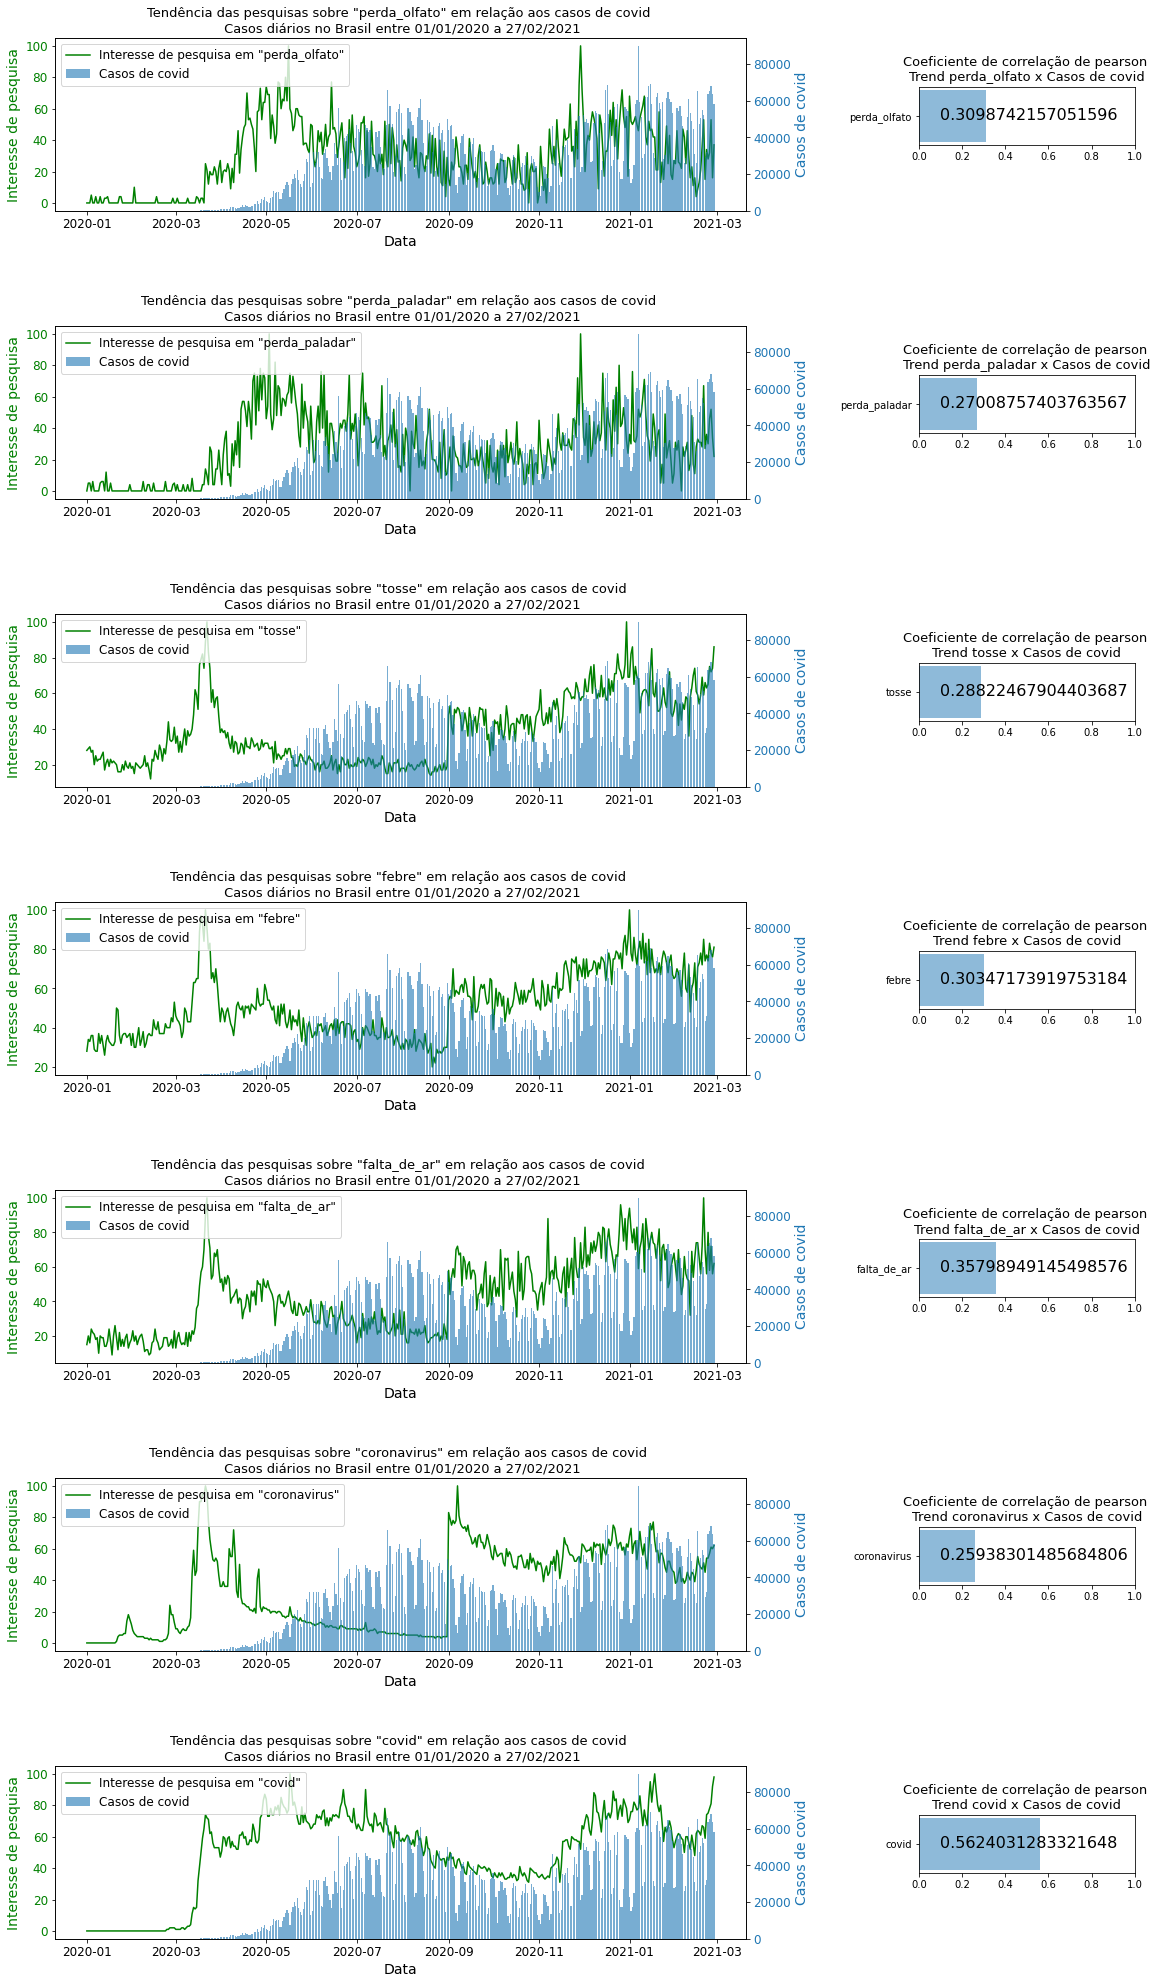

In [40]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Diários no Brasil
keywords = ['covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.6])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos diários no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosDiario_br['date'],df_casosDiario_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)
  
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosDiario_br['date'],df_casosDiario_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.5, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsDiaria_CasosCovid.index[j], df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()



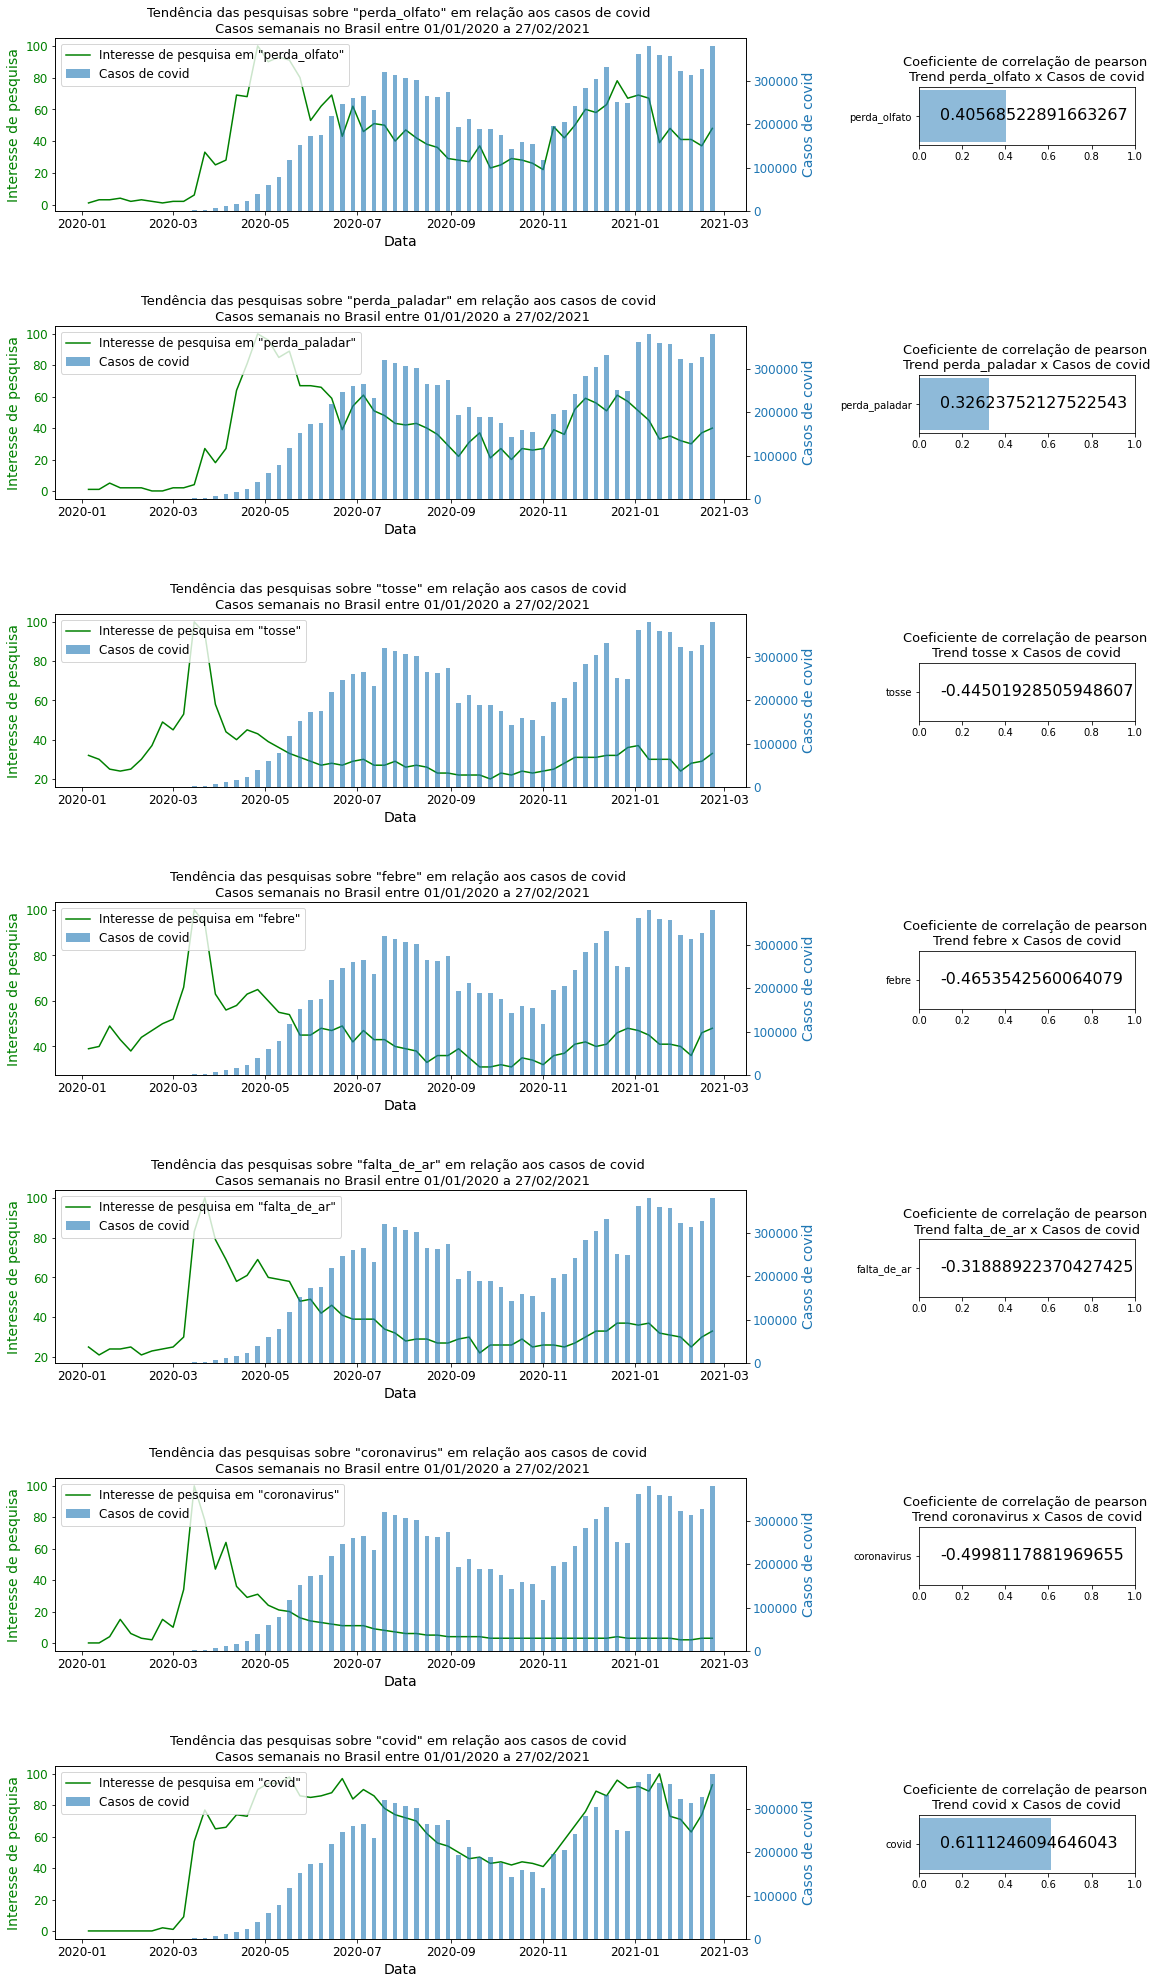

In [41]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Semanais no Brasil
keywords = ['covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.6])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos semanais no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosSemanal_br['date'],df_casosSemanal_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)
  
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosSemanal_br['date'],df_casosSemanal_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color, width=3)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)


  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.5, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsSemanal_CasosCovid.index[j], df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()